In [30]:
import seaborn as sns
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [31]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic', 'anagrams', 'anagrams', 'anscombe', 'anscombe', 'attention', 'attention', 'brain_networks', 'brain_networks', 'car_crashes', 'car_crashes', 'diamonds', 'diamonds', 'dots', 'dots', 'dowjones', 'dowjones', 'exercise', 'exercise', 'flights', 'flights', 'fmri', 'fmri', 'geyser', 'geyser', 'glue', 'glue', 'healthexp', 'healthexp', 'iris', 'iris', 'mpg', 'mpg', 'penguins', 'penguins', 'planets', 'planets', 'seaice', 'seaice', 'taxis', 'taxis', 'tips', 'tips', 'titanic', 'titanic', 'anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [32]:
dataFrame=sns.load_dataset('flights')
dataFrame.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [33]:
# convert the date in a YYYY-MM-DD format in a new colums named yearMonth
dataFrame['yearMonth']= '01-'+ dataFrame['month'].astype(str) +'-'+ dataFrame['year'].astype(str)
dataFrame.head()

,year,month,passengers,yearMonth
0,1949,Jan,112,01-Jan-1949
1,1949,Feb,118,01-Feb-1949
2,1949,Mar,132,01-Mar-1949
3,1949,Apr,129,01-Apr-1949
4,1949,May,121,01-May-1949


In [34]:
dataFrame['yearMonth']=pd.to_datetime('01-'+ dataFrame['month'].astype(str) +'-'+ dataFrame['year'].astype(str))
dataFrame

,year,month,passengers,yearMonth
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01
...,...,...,...,...
139,1960,Aug,606,1960-08-01
140,1960,Sep,508,1960-09-01
141,1960,Oct,461,1960-10-01
142,1960,Nov,390,1960-11-01


In [35]:
dataFrame.set_index('yearMonth',inplace=True)
dataFrame.head()

,year,month,passengers
yearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


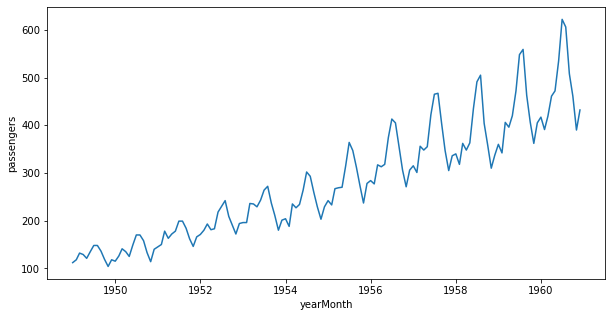

In [36]:
# visualize the time seriers
plt.figure(figsize=(10,5))
sns.lineplot(data=dataFrame,x=dataFrame.index,y=dataFrame.passengers)
plt.show()

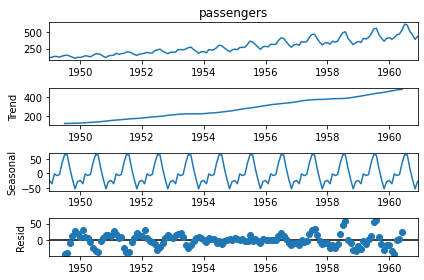

In [37]:
# check further for seasonalyt and trends
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataFrame.passengers,period=12)
fig=decomposition.plot()
plt.show()
# upward trends and clear seasonality 


yearMonth
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: rollMean, Length: 144, dtype: float64
yearMonth
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
                ...    
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125
Name: rollStd, Length: 144, dtype: float64


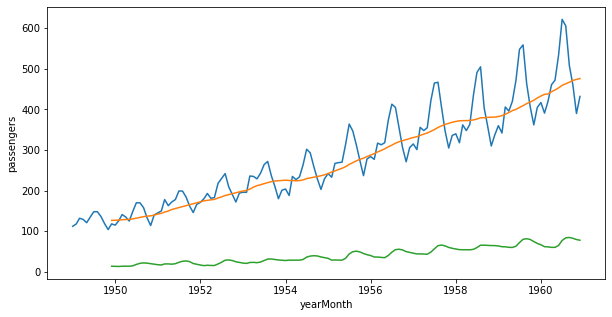

In [38]:
# calculate and plot rolling mean and standard deviations for 12 months
dataFrame['rollMean']=dataFrame.passengers.rolling(window=12).mean()
dataFrame['rollStd']=dataFrame.passengers.rolling(window=12).std()

print(dataFrame['rollMean'])
print(dataFrame['rollStd'])

plt.figure(figsize=(10,5))
sns.lineplot(data=dataFrame,x=dataFrame.index,y=dataFrame.passengers)
sns.lineplot(data=dataFrame,x=dataFrame.index,y=dataFrame.rollMean)
sns.lineplot(data=dataFrame,x=dataFrame.index,y=dataFrame.rollStd)
plt.show()

# conclution mean is not stationary SD is stationary so out data is not stationary

In [40]:
# now lets us perform the AdataFrame test
from statsmodels.tsa.stattools import adfuller
adataFrameTest=adfuller(dataFrame['passengers'])
print(adataFrameTest) 

# let us intepret these values below by converting into a series

stats=pd.Series(adataFrameTest[0:4],index=['Test statistis','p-value','#lags used','number of observations used'])
print(stats)

# H0 time series is not stationary
for key ,value in adataFrameTest[4].items():
    print('critically',key,":",value)

# we will see that our test statistic > Critical value in all the cases so we do not reject the null hypothesis it means that out data is not stationary

(0.8153688792060431, 0.9918802434376409, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.6929308390189)
Test statistis                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
critically 1% : -3.4816817173418295
critically 5% : -2.8840418343195267
critically 10% : -2.578770059171598


            passengers  shift  shiftDiff
yearMonth                               
1949-01-01         112    NaN        NaN
1949-02-01         118  112.0        6.0
1949-03-01         132  118.0       14.0
1949-04-01         129  132.0       -3.0
1949-05-01         121  129.0       -8.0
Test statistis                  -2.829267
p-value                          0.054213
#lags used                      12.000000
number of observations used    130.000000
dtype: float64
critically 1% : -3.4816817173418295
critically 5% : -2.8840418343195267
critically 10% : -2.578770059171598


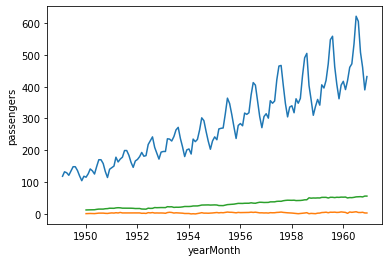

            passengers  shift  shiftDiff
yearMonth                               
1949-01-01         112    NaN        NaN
1949-02-01         118  112.0        6.0
1949-03-01         132  118.0       14.0
1949-04-01         129  132.0       -3.0
1949-05-01         121  129.0       -8.0
Test statistis                  -2.829267
p-value                          0.054213
#lags used                      12.000000
number of observations used    130.000000
dtype: float64
critically 1% : -3.4816817173418295
critically 5% : -2.8840418343195267
critically 10% : -2.578770059171598


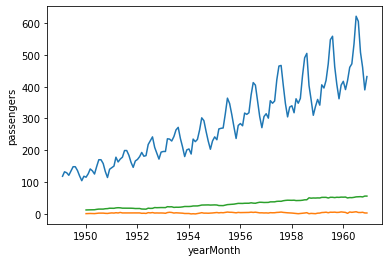

In [41]:
# by default shift is by 1 time periodd (here one month)
# create  a new column which whil contain the shifted calues from passenger column see slide 
def test_stationaryity(dataFrame,var):
    dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
    dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()
    from statsmodels.tsa.stattools import adfuller
    adataFrameTest=adfuller(dataFrame[var])
    stats=pd.Series(adataFrameTest[0:4],index=['Test statistis','p-value','#lags used','number of observations used'])
    print(stats)

    # H0 time series is not stationary
    for key ,value in adataFrameTest[4].items():
        print('critically',key,":",value)
    sns.lineplot(data=dataFrame,x=dataFrame.index,y=dataFrame.passengers)
    sns.lineplot(data=dataFrame,x=dataFrame.index,y=dataFrame.rollMean)
    sns.lineplot(data=dataFrame,x=dataFrame.index,y=dataFrame.rollStd)
    plt.show()
air_df=dataFrame[['passengers']].copy()
air_df['shift']= air_df.passengers.shift(1)
air_df['shiftDiff']= air_df['passengers']-air_df['shift']
print(air_df.head())
test_stationaryity(air_df.dropna(),'shiftDiff')
# p value is just close to 0.05 so let us try a shift of 2 

air_df['shift']= air_df.passengers.shift(1)
air_df['shiftDiff']= air_df['passengers']-air_df['shift']
print(air_df.head())
test_stationaryity(air_df.dropna(),'shiftDiff')


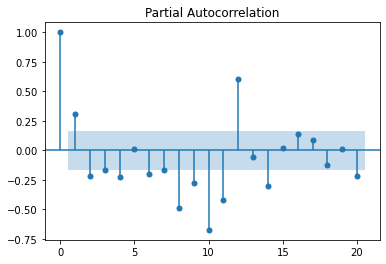

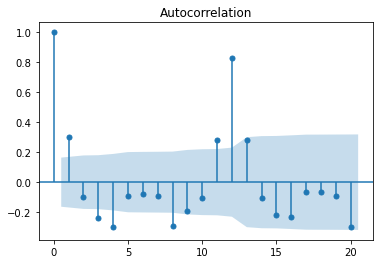

            passengers  shift  shiftDiff  firstDiff  Diff12  arimaPred  \
yearMonth                                                                
1957-01-01         315  306.0        9.0        9.0    31.0        NaN   
1957-02-01         301  315.0      -14.0      -14.0    24.0        NaN   
1957-03-01         356  301.0       55.0       55.0    39.0        NaN   
1957-04-01         348  356.0       -8.0       -8.0    35.0        NaN   
1957-05-01         355  348.0        7.0        7.0    37.0        NaN   

            SARIMAX  
yearMonth            
1957-01-01      NaN  
1957-02-01      NaN  
1957-03-01      NaN  
1957-04-01      NaN  
1957-05-01      NaN  
            passengers  shift  shiftDiff  firstDiff  Diff12   arimaPred  \
yearMonth                                                                 
1957-06-01         422  355.0       67.0       67.0    48.0  414.348171   
1957-07-01         465  422.0       43.0       43.0    52.0  461.495495   
1957-08-01         467  465

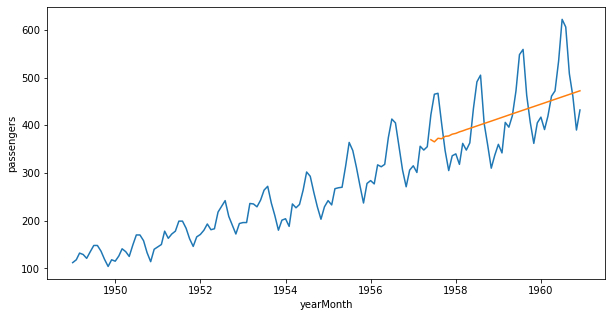

In [46]:
#  ARIMA
# create columns for one month and one year lagged data
air_df['firstDiff']=air_df['passengers'].diff()
air_df['Diff12']=air_df['passengers'].diff(12)
# this will be used later in SARIMAX

# in google colab you may need !pip install pmdarima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_pacf(air_df['firstDiff'].dropna(),lags=20)
plt.show()
plot_acf(air_df['firstDiff'].dropna(),lags=20)
plt.show()

# let us take p =1 q =3 (both are signifiacant) and d = 2 alread known 
# Builing ARIMA model
train = air_df[:round(len(air_df)*70/100)]
print(train.tail())

test=air_df[round(len(air_df)*70/100):]
print(test.head())

model = ARIMA(train['passengers'],order=(1,2,3))
model_fit=model.fit()
predition=model_fit.predict(start=test.index[0],end=test.index[-1])
air_df['arimaPred']=predition
print(air_df.tail())

# plot
plt.figure(figsize=(10,5))
sns.lineplot(data=air_df,x=air_df.index,y=air_df.passengers)
sns.lineplot(data=air_df,x=air_df.index,y=air_df.arimaPred)
plt.show()
# concultion ARIMA prediction is not good

            passengers  shift  shiftDiff  firstDiff  Diff12   arimaPred  \
yearMonth                                                                 
1960-08-01         606  622.0      -16.0      -16.0    47.0  462.073152   
1960-09-01         508  606.0      -98.0      -98.0    45.0  464.613358   
1960-10-01         461  508.0      -47.0      -47.0    54.0  467.153578   
1960-11-01         390  461.0      -71.0      -71.0    28.0  469.693789   
1960-12-01         432  390.0       42.0       42.0    27.0  472.234006   

               SARIMAX  
yearMonth               
1960-08-01  588.771542  
1960-09-01  518.387441  
1960-10-01  452.615037  
1960-11-01  402.835503  
1960-12-01  450.814892  


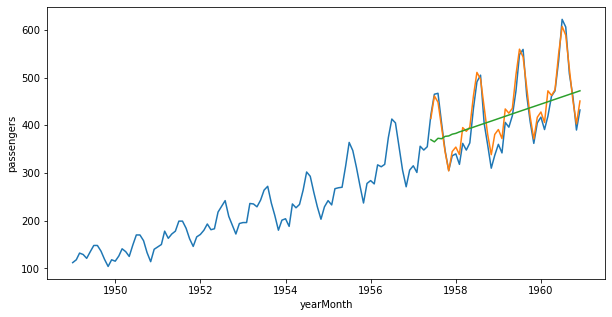

In [47]:
# New SARIMAX prediction
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train['passengers'],order=(1,2,1),seasonal_order=(1,2,1,12))
model_fit=model.fit()
predition=model_fit.predict(start=test.index[0],end=test.index[-1])
air_df['SARIMAX']=predition
print(air_df.tail())

# plot
plt.figure(figsize=(10,5))
sns.lineplot(data=air_df,x=air_df.index,y=air_df.passengers)
sns.lineplot(data=air_df,x=air_df.index,y=air_df.SARIMAX)
sns.lineplot(data=air_df,x=air_df.index,y=air_df.arimaPred)
plt.show()
# compared to ARIMA, SARIMA is much better

Empty DataFrame
Columns: []
Index: [1961-01-01 00:00:00, 1961-02-01 00:00:00, 1961-03-01 00:00:00, 1961-04-01 00:00:00, 1961-05-01 00:00:00]
1961-01-01    462.580612
1961-02-01    437.573142
1961-03-01    508.370587
1961-04-01    497.751393
1961-05-01    511.055880
1961-06-01    591.695883
1961-07-01    652.358067
1961-08-01    632.049656
1961-09-01    555.873424
1961-10-01    485.377304
1961-11-01    432.024470
1961-12-01    482.589824
1962-01-01    494.991846
1962-02-01    466.834708
1962-03-01    541.983397
1962-04-01    530.358788
1962-05-01    545.085796
1962-06-01    630.769773
1962-07-01    694.884183
1962-08-01    672.433102
1962-09-01    590.364873
1962-10-01    515.055509
1962-11-01    458.080598
1962-12-01    511.134374
Freq: MS, Name: predicted_mean, dtype: float64


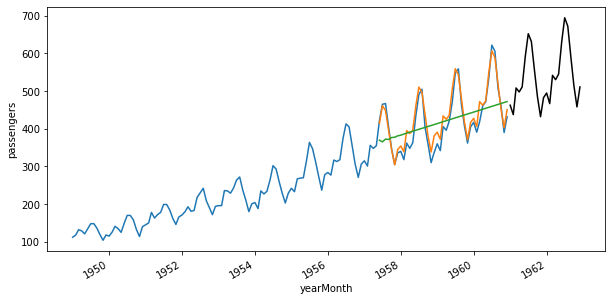

In [48]:
# Future prediction
# first check the last data in out dataset

# MS month start frequency
# create a data from to hold index values from 01.01.61 to 01,12,62
futureDate = pd.DataFrame(pd.date_range(start='1961-01-01',end='1962-12-01',freq='MS'),columns=['Dates'])
futureDate.set_index('Dates',inplace=True)
print(futureDate.head())

# predict and print
print(model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]))

# plot
air_df.dropna()
plt.figure(figsize=(10,5))
sns.lineplot(data=air_df,x=air_df.index,y=air_df.passengers)
sns.lineplot(data=air_df,x=air_df.index,y=air_df.SARIMAX)
sns.lineplot(data=air_df,x=air_df.index,y=air_df.arimaPred)
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot(color='black')
plt.show()
